In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use("~/matplotlib.mplstyle")
plt.rcParams['font.family'] = 'cursive'
plt.rcParams['axes.labelsize'] = 'medium'

In [3]:
tg = pd.read_csv('../runs/abstract/tg_metrics.csv')
eg = pd.read_csv('../runs/abstract/eg_metrics.csv')

Save OK: abstract-f1-scores.svg


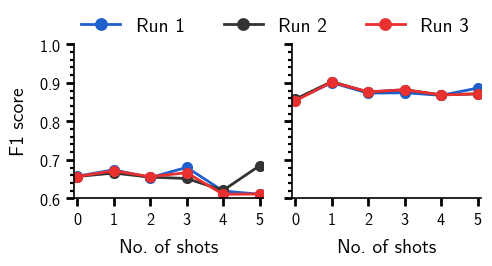

In [8]:
runs = tg.run.unique()

# Plot f-1 
outfile = "abstract-f1-scores.svg"

fig, axes = plt.subplots(1,2, sharey=True, figsize=(2.63, 1.0), dpi=200)

ax = axes[0]
for r in runs:
    mask = (tg.run == r) & (tg.api == 'llm')
    y_llm = tg[mask]['F1']
    x = tg[mask]['shots']
    ax.plot(x, y_llm, '.-', label="Run %d" %r)
ax.set(ylabel='F1 score', xlabel='No. of shots', xticks=range(0, 6))
ax.tick_params(axis='x', which='minor', bottom=False)
ax.legend(loc=(0.0, 1.01), ncol=3)

ax = axes[1]
for r in runs:
    mask = (eg.run == r) & (eg.api == 'llm')
    y_llm = eg[mask]['F1']
    x = eg[mask]['shots']
    ax.plot(x, y_llm, '.-', label="Run %d" %r)

ax.set(xlabel='No. of shots', ylim=(0.6, 1.0), xticks=range(0, 6))
ax.tick_params(axis='x', which='minor', bottom=False)
plt.subplots_adjust(wspace=0.15)
# plt.tight_layout()
plt.savefig(outfile, dpi=600)
print("Save OK:", outfile)
plt.show()